# Market Basket Analysis - Apriori Algorithm

### Domain : Retail

### Table of Contents

#### 1. **Information**
    - Questions Arising
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype

#### 3. **Data Cleaning & EDA**
    - Checking Null values
    - EDA

#### 4. **Apriori Algorithm**
    - Pivot table (Forming a basket)
    - Apriori Implementation
    - Association Rules

#### 5. **Conclusion**


### Questions Arising :

- Based on Monetary Value or spendings , can we find Top 10 Customers ?


- What are the most expensive products ? 

### Objective :

- Perform Market Basket Analysis on UK Dataset for which we performed RFM Analysis in First Part.


- Mining frequent Item sets to generate association rules.

### Importing Required Packages

In [1]:
#importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install mlxtend

- Above we can see that we are installing new package called "mlxtend (machine learning extensions)."


- **Documentation : http://rasbt.github.io/mlxtend/**

In [2]:
#reading data

df = pd.read_csv('uk_retail_data.csv', header=0, parse_dates=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #conversion to datetime format
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
#shape of data

print ('No. of Records :',df.shape[0])
print ('No. of Features :', df.shape[1])

No. of Records : 354345
No. of Features : 9


### Data Cleansing & EDA

In [4]:
#dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354345 entries, 0 to 354344
Data columns (total 9 columns):
InvoiceNo      354345 non-null int64
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
Total_price    354345 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 24.3+ MB


In [5]:
#Missing values

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total_price    0
dtype: int64

In [6]:
#Max and Min Quantities

print ('Minimum Quantity :', min(df['Quantity']))
print ('Maximum Quantities :', max(df['Quantity']))

Minimum Quantity : 1
Maximum Quantities : 80995


**Observations :**

- Minimum Quantities purchased by a customer is 1 Unit.


- Maximum Quantities purchased are 80995 Units.

In [7]:
#Unique Transactions, products, customers

print ('Unique No. of Transactions :', len(pd.unique(df['InvoiceNo'])))
print ('Unique No. of Products :', len(pd.unique(df['Description'])))
print ('Unique No. of Customers :', len(pd.unique(df['CustomerID'])))

Unique No. of Transactions : 16649
Unique No. of Products : 3844
Unique No. of Customers : 3921


**Observations :**

- We've total 16649 Unique Invoices / Transactions. It could be by repeating customer or one-time customer.


- Unique Items found in our dataset are 3844.


- Unique Identified Customers count is 3921.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Top 10 Customers by Monetary Value')

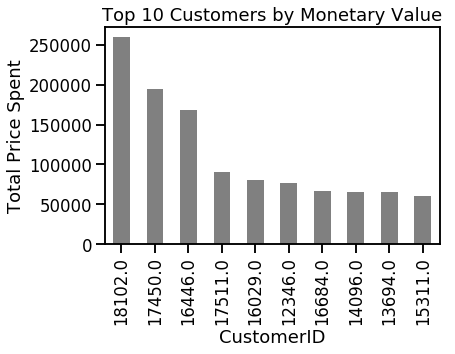

In [8]:
#best customers

sns.set_context('talk')

best_cust = df.groupby('CustomerID')['Total_price'].agg({'Total_price':'sum'})
best_cust = best_cust.sort_values(by='Total_price', ascending=False)

best_cust.head(10).plot(kind='bar', legend=False, color='grey')
plt.ylabel('Total Price Spent')
plt.title('Top 10 Customers by Monetary Value')

**Observations :**

- Above viz. depicts Monetary amount spent by Individual Customers.


- These are our top 10 consumers based on amount of money they spent.


- Here we are not considering Recency & Frequency , just Monetary amount.

Text(0.5, 1.0, 'Distribution of Unit Price')

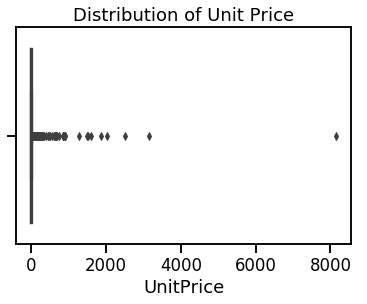

In [9]:
#Range of UnitPrice

sns.boxplot(df['UnitPrice'])
plt.title('Distribution of Unit Price')

**Observations :**

- The price distribution ranges from 0 to 8000.


- We can explore these values outliers.

In [10]:
#Top 10 expensive Products

df.sort_values(by='UnitPrice', ascending=False)[:10][['Description', 'UnitPrice']]

,Description,UnitPrice
105801,POSTAGE,8142.75
238996,Manual,3155.95
185202,Manual,2500.00
216128,Manual,2033.10
90221,Manual,1867.86
347381,DOTCOM POSTAGE,1599.26
334036,DOTCOM POSTAGE,1526.76
305859,DOTCOM POSTAGE,1500.36
324552,DOTCOM POSTAGE,1270.06
297232,DOTCOM POSTAGE,908.16


**Observations :**

- We've most expensive product as "POSTAGE", which must be a Postage charge paid by Consumer on some product.


- While, Manual could be service charge for Installation / Assembling a product. Since, we don not have any information of Retail company and product we could just best guess based on information we've in-hand.


- We can drop Manual, Postage and Dotcom Postage while creation of basket.

In [11]:
#slicing out UnitPrice with 0
df = df[df.UnitPrice != 0]

#Top 10 cheap products
df.sort_values(by='UnitPrice', ascending=True)[:10][['Description', 'UnitPrice']]

,Description,UnitPrice
172903,PADS TO MATCH ALL CUSHIONS,0.001
229497,Bank Charges,0.001
227787,PADS TO MATCH ALL CUSHIONS,0.001
95638,PADS TO MATCH ALL CUSHIONS,0.001
303257,POPART WOODEN PENCILS ASST,0.040
343601,POPART WOODEN PENCILS ASST,0.040
189020,POPART WOODEN PENCILS ASST,0.040
248019,POPART WOODEN PENCILS ASST,0.040
167203,POPART WOODEN PENCILS ASST,0.040
303188,POPART WOODEN PENCILS ASST,0.040


**Observations :**

- We had dropped columns with 0 Unit Price as they can be free or sub-products which could be a part of Major product. 


- Above are some cheapest games.

### Apriori Algorithm

-  We'll form a basket to apply Apriori Algorithm.


- We'll group on Invoice and use products as our columns & values as Quantity.


- We'll drop Postage, Bank Charges, Dotcom Postage, Manual as they won't make any sense.


- We had encode the Quantities that > 1 to 1.

In [0]:
#forming a basket

basket = pd.pivot_table(data=df, index='InvoiceNo', columns='Description', values='Quantity', fill_value=0)
#basket[10:20]

In [13]:
#value encoder

def encoder(data):
    if data >= 1:
        return 1
    else:
        return 0

#dropping POSTAGE
basket_enc = basket.applymap(encoder)
basket_enc.drop(['POSTAGE', 'Manual', 'DOTCOM POSTAGE', 'Bank Charges'], axis=1, inplace=True)
basket_enc[10:20]

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
536382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Working of Apriori Algorithm**

- Apriori is an algorithm for frequent item set mining and association rule learning over transactional databases.


- It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.


- Support, Confidence & Lift are our metrics to buid Association Rules.


![alt text](https://miro.medium.com/max/1067/1*--iUPe_DtzKdongjqZ2lOg.png)

In [19]:
#implementing Apriori @ support 0.025

from mlxtend.frequent_patterns import apriori, association_rules

freq_itemset = apriori(df=basket_enc, min_support=0.025, use_colnames=True, )
freq_itemset.sort_values(by='support', ascending=False)

,support,itemsets
131,0.113180,(WHITE HANGING HEART T-LIGHT HOLDER)
59,0.086928,(JUMBO BAG RED RETROSPOT)
105,0.084705,(REGENCY CAKESTAND 3 TIER)
9,0.078097,(ASSORTED COLOUR BIRD ORNAMENT)
93,0.077496,(PARTY BUNTING)
76,0.067283,(LUNCH BAG RED RETROSPOT)
113,0.060495,(SET OF 3 CAKE TINS PANTRY DESIGN )
70,0.059834,(LUNCH BAG BLACK SKULL.)
90,0.056770,(PAPER CHAIN KIT 50'S CHRISTMAS )
83,0.056350,(NATURAL SLATE HEART CHALKBOARD )


- By keeping our Support threshold to 0.025 we get some better results for Association Rules.


- We've got 149 records of Frequent Individual Items and Frequent Paired / Brought together items.


- Let's implement association rules now.

In [20]:
#calculating confidence & lift metrics

rules = association_rules(df=freq_itemset, metric='lift', min_threshold=1)
rules[['antecedents','consequents', 'support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.027274,0.598945,14.449321
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.027274,0.657971,14.449321
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.027514,0.730463,16.387169
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.027514,0.617251,16.387169
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028595,0.702065,19.095706
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.028595,0.777778,19.095706
6,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.030398,0.349689,7.168625
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.030398,0.623153,7.168625
8,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.026553,0.521226,8.711180
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG PINK POLKADOT),0.026553,0.443775,8.711180


- In practice it is considered that Lift value above 1 is best Association. 


- For example, If a customer bought (ALARM CLOCK BAKELIKE RED ) then he will likely purchase (ALARM CLOCK BAKELIKE GREEN) as well.


- For our conserdation we'll slice the values having Confidence >= 0.5 & Lift >= 5.

In [22]:
rules[(rules.confidence >= 0.5) & (rules.lift >= 5)][['antecedents','consequents', 'support','confidence','lift']].sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028595,0.702065,19.095706
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.028595,0.777778,19.095706
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.027514,0.730463,16.387169
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.027514,0.617251,16.387169
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.027274,0.598945,14.449321
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.027274,0.657971,14.449321
18,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.027514,0.584184,11.386793
19,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.027514,0.536300,11.386793
14,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.026253,0.645495,11.370272
8,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.026553,0.521226,8.711180


- By above Slicing & Sorting we can say that above products are highly associated.


- If a person buys product A (Antecedents) then he/she will like opt for product C (Consequents) because Confidence is above 0.50 & Lift above 5.


- With this we conclude our Market Basket Analysis for UK Data.

**Conclusion :**

- We had performed Market Basket Analysis and interpreted the results.


- We can focus on products with confdence 0.5 and lift value greater than equals 1 but less than 5 because life value greater than 1 is condered to be acceptable.